In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

(26, 2) (26,)


C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


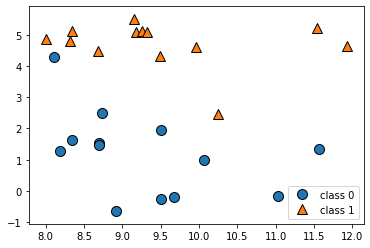

In [4]:
X,y = mglearn.datasets.make_forge()

print(X.shape,y.shape)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['class 0','class 1'],loc=4)

(-3.0, 3.0)

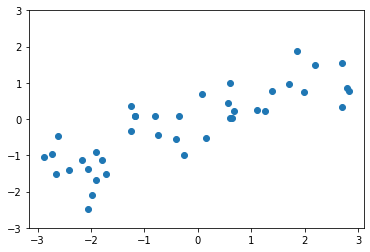

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
type(cancer)
cancer.data.shape

(569, 30)

In [8]:
{n:v for n,v in zip(cancer.target_names,np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

(506, 13)

In [11]:
X,y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

# KNN 분류

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


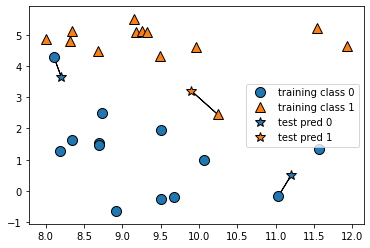

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


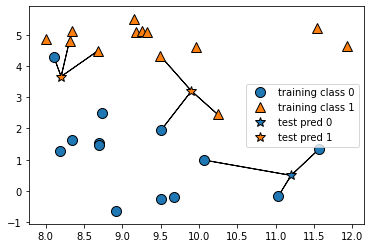

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [14]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [18]:
clf.score(X_test,y_test)

0.8571428571428571

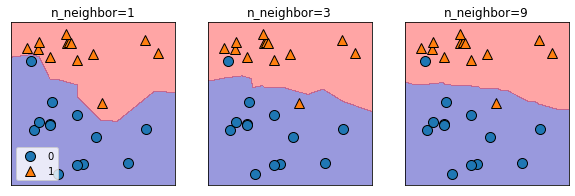

In [19]:
fig,axs = plt.subplots(1,3,figsize=(10,3))
for n_neighbors, ax in zip([1,3,9],axs):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("n_neighbor={}".format(n_neighbors))
axs[0].legend(loc=3)

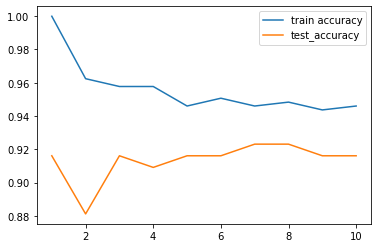

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target, stratify=cancer.target, random_state=0)
training_accuracy=[]
test_accuracy=[]

neighbors_setting = range(1,11)
for n_neighbors in neighbors_setting:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_setting, training_accuracy, label='train accuracy')
plt.plot(neighbors_setting, test_accuracy,label='test_accuracy')
plt.legend()

# KNN 회귀

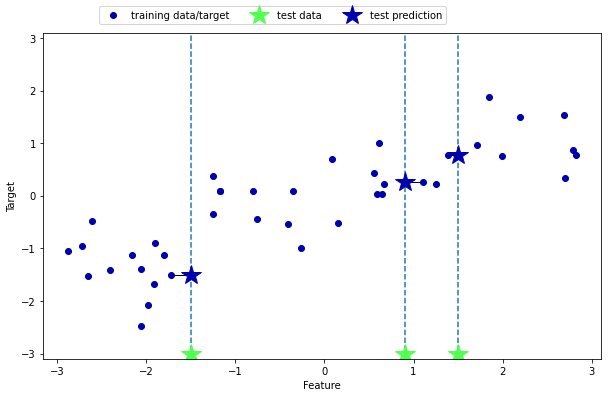

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

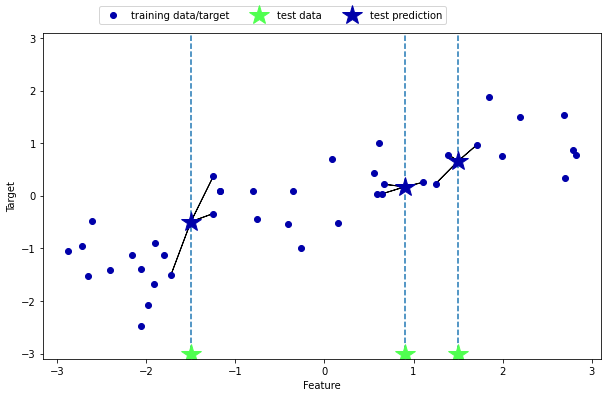

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [24]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [25]:
reg.score(X_test,y_test)

0.8344172446249605

No handles with labels found to put in legend.


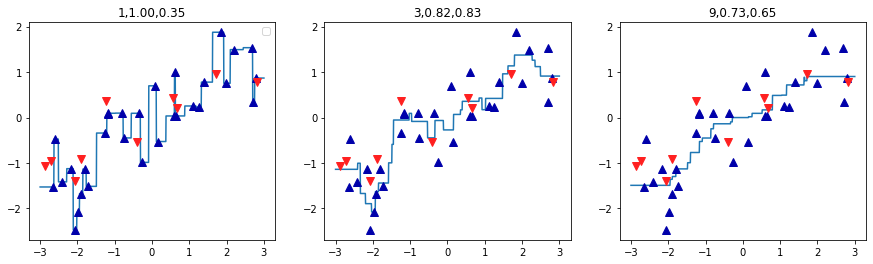

In [26]:
fig,axs=plt.subplots(1,3,figsize=(15,4))
#-3 ~ 3 까지 1000개의 데이터 포인트를 만듬
line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axs):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title("{},{:.2f},{:.2f}".format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
axs[0].legend(loc='best')

# 선형 모델

w[0]: 0.393906  b: -0.031804


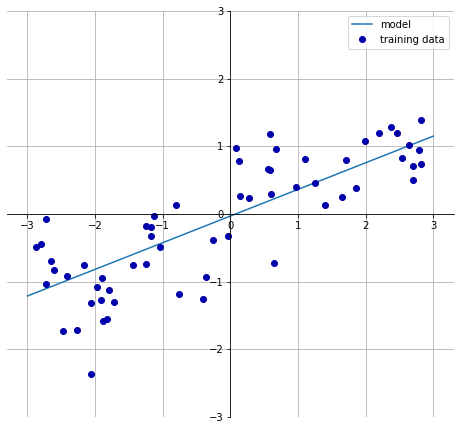

In [27]:
mglearn.plots.plot_linear_regression_wave()

In [28]:
from sklearn.linear_model import LinearRegression
X,y=mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

lr=LinearRegression().fit(X_train,y_train)

In [29]:
lr.coef_

array([0.39390555])

In [30]:
lr.intercept_

-0.031804343026759746

In [31]:
print(lr.score(X_train,y_train),lr.score(X_test,y_test))

0.6700890315075756 0.65933685968637


In [32]:
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [33]:
print(lr.score(X_train,y_train),lr.score(X_test,y_test))

0.952051960903273 0.6074721959665708


In [36]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print('훈련 점수 : {:.2f}'.format(ridge.score(X_train,y_train)))
print('테스트 점수 : {:.2f}'.format(ridge.score(X_test,y_test)))

훈련 점수 : 0.89
테스트 점수 : 0.75


In [38]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print('훈련 점수 : {:.2f}'.format(ridge10.score(X_train,y_train)))
print('테스트 점수 : {:.2f}'.format(ridge10.score(X_test,y_test)))

훈련 점수 : 0.79
테스트 점수 : 0.64


In [39]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print('훈련 점수 : {:.2f}'.format(ridge01.score(X_train,y_train)))
print('테스트 점수 : {:.2f}'.format(ridge01.score(X_test,y_test)))

훈련 점수 : 0.93
테스트 점수 : 0.77


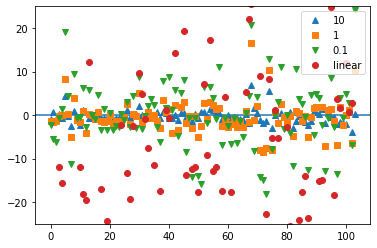

In [41]:
plt.plot(ridge10.coef_,'^',label='10')
plt.plot(ridge.coef_,'s',label='1')
plt.plot(ridge01.coef_,'v',label='0.1')
plt.plot(lr.coef_,'o',label="linear")
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

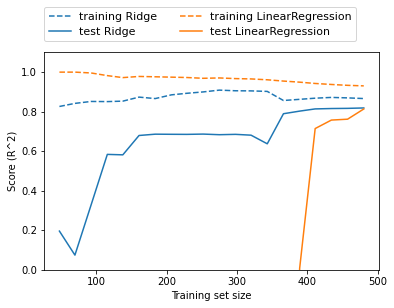

In [42]:
mglearn.plots.plot_ridge_n_samples()

# LASSO : 어떤계수는 정말 0이 된다

In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 개수 :",np.sum(lasso.coef_ != 0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수 : 4


In [45]:
lasso001 = Lasso(alpha=0.01,max_iter=50000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 개수 :",np.sum(lasso001.coef_ != 0))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수 : 33


# 서포트 백터, 로지스틱 회귀 사용

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


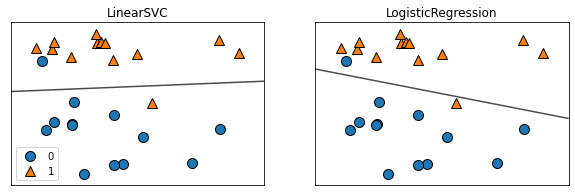

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
axes[0].legend()

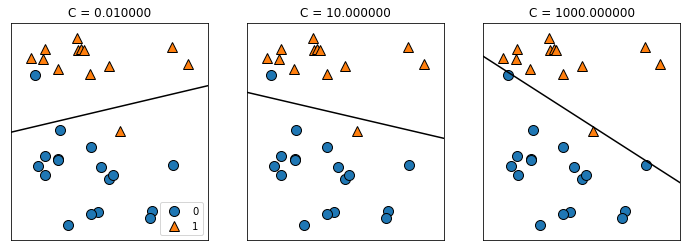

In [52]:
mglearn.plots.plot_linear_svc_regularization()

In [56]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print('훈련 세트 점수 : {:.3f}'.format(logreg.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg.score(X_test,y_test)))

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958


In [57]:
logreg100 = LogisticRegression(C=100,max_iter=5000).fit(X_train, y_train)
print('훈련 세트 점수 : {:.3f}'.format(logreg100.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg100.score(X_test,y_test)))

훈련 세트 점수 : 0.984
테스트 세트 점수 : 0.965


In [58]:
logreg001 = LogisticRegression(C=0.01,max_iter=5000).fit(X_train, y_train)
print('훈련 세트 점수 : {:.3f}'.format(logreg001.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(logreg001.score(X_test,y_test)))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951


In [64]:
for C in [0.001,1,100]:
    lr_l1 = LogisticRegression(solver='liblinear',C=C,penalty='l1',max_iter=1000).fit(X_train,y_train)
    print("훈련 세트 점수 : {:.2f}".format(lr_l1.score(X_train,y_train)))
    print("테스트 세트 점수 : {:.2f}".format(lr_l1.score(X_test,y_test)))
    print("사용한 특성의 개수 :",np.sum(lr_l1.coef_ != 0))
    print()

훈련 세트 점수 : 0.91
테스트 세트 점수 : 0.92
사용한 특성의 개수 : 3

훈련 세트 점수 : 0.96
테스트 세트 점수 : 0.96
사용한 특성의 개수 : 10

훈련 세트 점수 : 0.99
테스트 세트 점수 : 0.98
사용한 특성의 개수 : 23



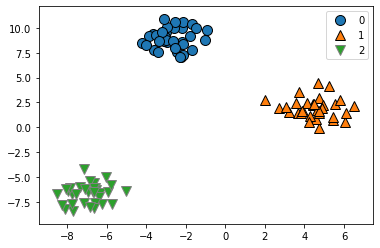

In [66]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['0','1','2'])

In [67]:
linear_svm = LinearSVC().fit(X,y)
print('계수 배열의 크기 : ',linear_svm.coef_.shape)
print('절편 배열의 크기 : ',linear_svm.intercept_.shape)

계수 배열의 크기 :  (3, 2)
절편 배열의 크기 :  (3,)


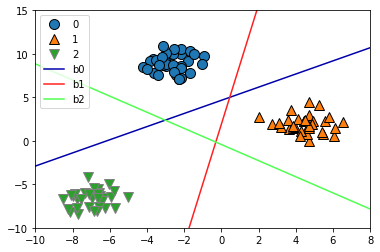

In [70]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.xlim(-10,8)
plt.ylim(-10,15)
plt.legend(['0','1','2','b0','b1','b2'])

# 정리
# 1. 회귀 모델에서 주요 매개변수는 alpha, LinearSVC 와 LogisticRegression에서 주요 매개변수는 C이다. alpha값이 클수록 또는 C값이 작을수록 모델이 단순해진다. 보통 로그 스케일로 최적치를 정한다.
 
# 2. 중요한 특정이 많지 않다고 생각하면 Lasso(L1규제) 사용, 그렇지 않으면 Ridge(L2규제)사용